In [1]:
!git clone https://github.com/garima-mahato/ERA_V1.git

Cloning into 'ERA_V1'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 21 (delta 7), reused 12 (delta 4), pack-reused 0
Unpacking objects: 100% (21/21), 4.91 KiB | 1.23 MiB/s, done.


CODE BLOCK: 1

In [7]:
from ERA_V1.Session7_InDepthCodingPractice import *

CODE BLOCK: 2

In [12]:
# # CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = set_device()

CUDA Available? True


CODE BLOCK: 3

In [13]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [14]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [15]:
# set seed
torch.manual_seed(1)

batch_size = 512

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

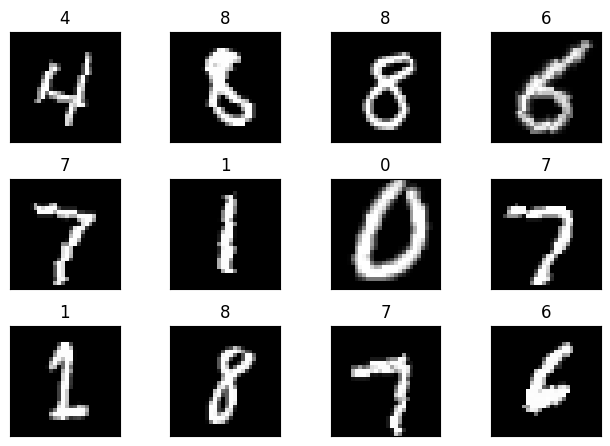

In [16]:


view_data(train_loader)

CODE BLOCK: 8

In [18]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [20]:
model = Model_1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  test(model, device, test_loader, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4035 Batch_id=117 Accuracy=43.25: 100%|██████████| 118/118 [00:34<00:00,  3.40it/s]


Test set: Average loss: 0.2886, Accuracy: 9154/10000 (91.54%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1115 Batch_id=117 Accuracy=92.75: 100%|██████████| 118/118 [00:27<00:00,  4.33it/s]


Test set: Average loss: 0.1006, Accuracy: 9697/10000 (96.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0739 Batch_id=117 Accuracy=95.98: 100%|██████████| 118/118 [00:27<00:00,  4.36it/s]


Test set: Average loss: 0.0644, Accuracy: 9814/10000 (98.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1233 Batch_id=117 Accuracy=96.94: 100%|██████████| 118/118 [00:27<00:00,  4.33it/s]


Test set: Average loss: 0.0518, Accuracy: 9836/10000 (98.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0437 Batch_id=117 Accuracy=97.28: 100%|██████████| 118/118 [00:27<00:00,  4.25it/s]


Test set: Average loss: 0.0442, Accuracy: 9850/10000 (98.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0982 Batch_id=117 Accuracy=97.68: 100%|██████████| 118/118 [00:27<00:00,  4.34it/s]


Test set: Average loss: 0.0438, Accuracy: 9849/10000 (98.49%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0239 Batch_id=117 Accuracy=98.05: 100%|██████████| 118/118 [00:27<00:00,  4.33it/s]


Test set: Average loss: 0.0346, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0843 Batch_id=117 Accuracy=98.20: 100%|██████████| 118/118 [00:27<00:00,  4.33it/s]


Test set: Average loss: 0.0346, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0354 Batch_id=117 Accuracy=98.30: 100%|██████████| 118/118 [00:27<00:00,  4.37it/s]


Test set: Average loss: 0.0311, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0389 Batch_id=117 Accuracy=98.39: 100%|██████████| 118/118 [00:27<00:00,  4.27it/s]


Test set: Average loss: 0.0325, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0608 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [00:27<00:00,  4.35it/s]


Test set: Average loss: 0.0296, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0337 Batch_id=117 Accuracy=98.65: 100%|██████████| 118/118 [00:27<00:00,  4.35it/s]


Test set: Average loss: 0.0263, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0673 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:27<00:00,  4.33it/s]


Test set: Average loss: 0.0271, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0157 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:27<00:00,  4.36it/s]


Test set: Average loss: 0.0247, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0438 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:27<00:00,  4.28it/s]


Test set: Average loss: 0.0253, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0872 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:26<00:00,  4.39it/s]


Test set: Average loss: 0.0220, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0199 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:26<00:00,  4.41it/s]


Test set: Average loss: 0.0214, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.1040 Batch_id=117 Accuracy=99.10: 100%|██████████| 118/118 [00:27<00:00,  4.30it/s]


Test set: Average loss: 0.0211, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0311 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:26<00:00,  4.42it/s]


Test set: Average loss: 0.0209, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0400 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:27<00:00,  4.34it/s]


Test set: Average loss: 0.0203, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.


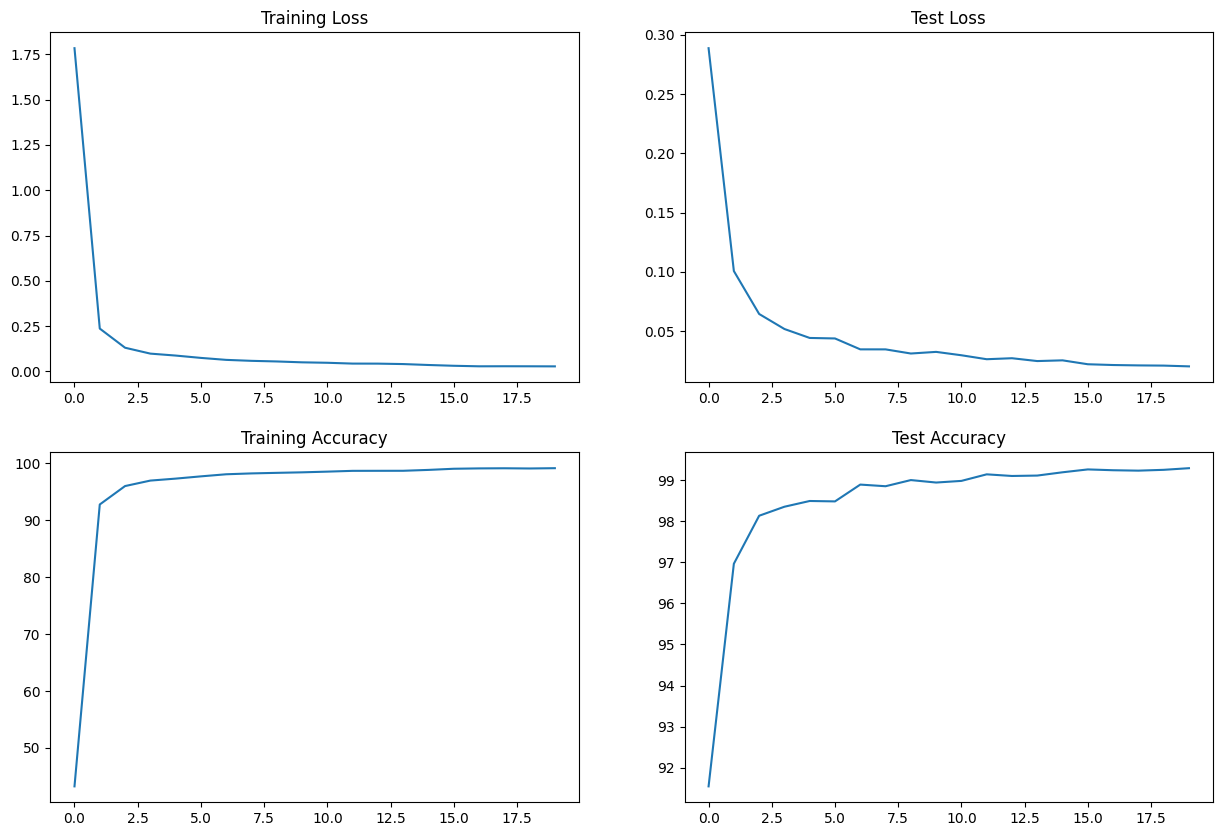

In [21]:
vis_train_test_comp_graphs(train_losses, train_acc, test_losses, test_acc)

In [22]:
!pip install torchsummary
from torchsummary import summary

summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [25]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-3737jqvk
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-3737jqvk
  Resolved https://github.com/szagoruyko/pytorchviz.git to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done


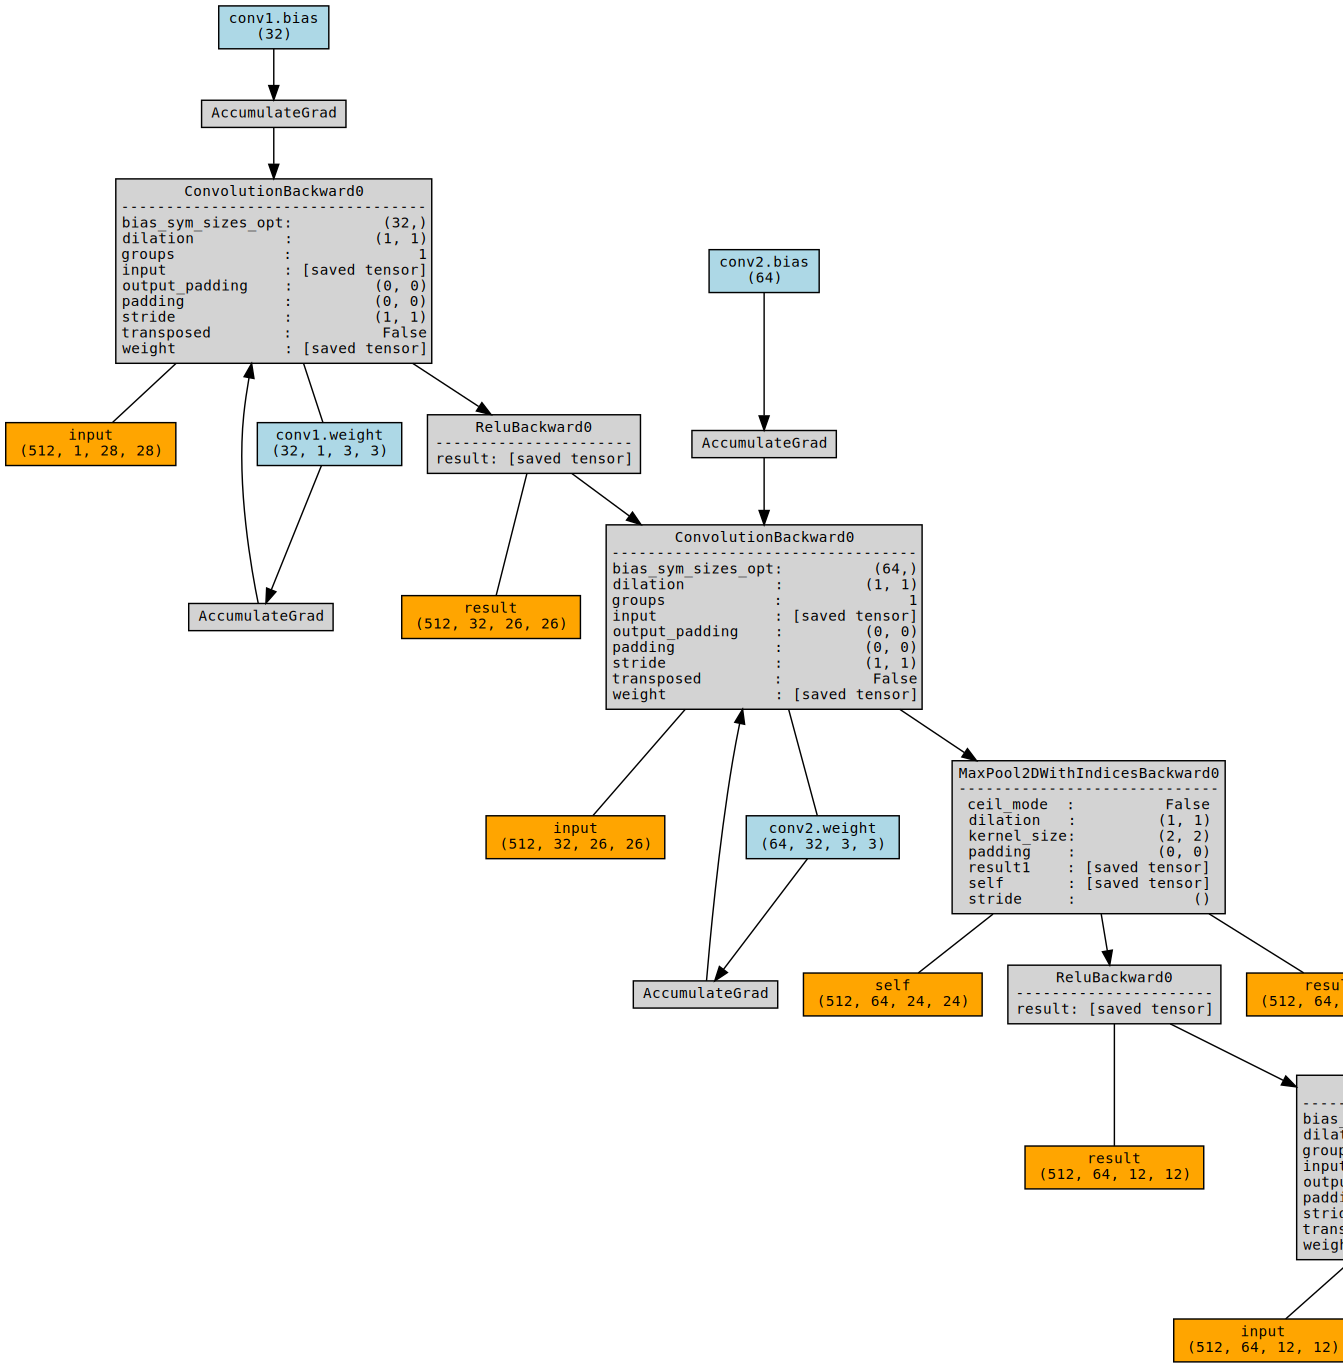

In [32]:
batch_data, batch_label = next(iter(train_loader))
batch_data = batch_data.to(device)
y = model(batch_data)

make_dot(y, params=dict(list(model.named_parameters())), show_attrs=True, show_saved=True)
#.render("mnist_cnn_torchviz", format="png")